In [1]:
import glob
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# load cluster indice

/glade/derecho/scratch/guoqiang/tmp/ipykernel_48317/2147236598.py:17: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_cluster2.sel_index = np.arange(len(df_cluster2))


basins and clusters match
Number 45
[467 494 495 496 497 498 508 509 510 511 512 513 514 515 516 517 518 521
 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540
 541 554 609 620 621 622 624 625 626]


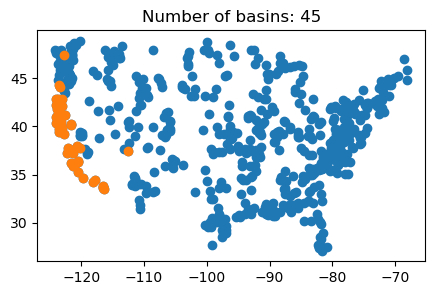

In [2]:
# load basin info
infile_basin_info = f"/glade/work/guoqiang/CTSM_CAMELS/data_mesh_surf/HillslopeHydrology/CAMELS_level1_basin_info.csv"
df_info = pd.read_csv(infile_basin_info)

# load cluster info
infile = "../camels_cluster/Manuela_Brunner_2020/flood_cluster_memberships_CAMELS.txt"
df_cluster = pd.read_csv(infile)
df_cluster = df_cluster.rename(
    columns={"Camels_IDs": "hru_id", "flood_cluster": "clusters"}
)
df_cluster2 = pd.DataFrame()

for id in df_info["hru_id"].values:
    dfi = df_cluster.loc[df_cluster["hru_id"] == id]
    df_cluster2 = pd.concat([df_cluster2, dfi])

df_cluster2.sel_index = np.arange(len(df_cluster2))
df_cluster = df_cluster2
del df_cluster2
df_cluster["clusters"] = df_cluster["clusters"] - 1  # starting from 0

if np.any(df_info["hru_id"].values - df_cluster['hru_id'].values != 0):
    print("Mistmatch between basins and clusters")
else:
    print("basins and clusters match")


sel_cluster = 2
sel_index = df_cluster["clusters"].values == sel_cluster
print('Number', np.sum(sel_index))
print(np.where(sel_index)[0])

plt.figure(figsize=[5, 3])
plt.scatter(df_info["lon_cen"], df_info["lat_cen"])
plt.scatter(df_info["lon_cen"].values[sel_index], df_info["lat_cen"].values[sel_index])
plt.title(f"Number of basins: {np.sum(sel_index)}")
plt.show()

# load iter-1 and iter-0 metrics

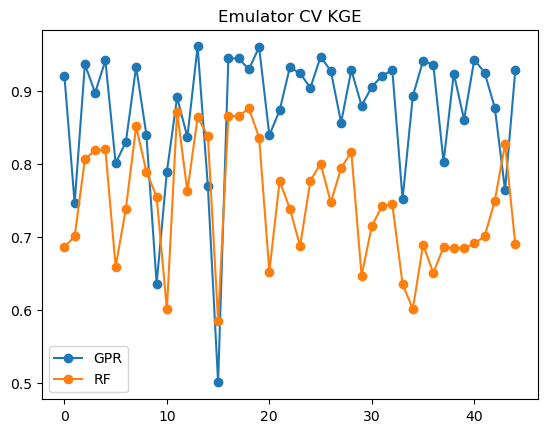

In [35]:
cvkge = np.zeros([len(basinindex), 2])
for i in range(len(basinindex)):
    file = f"/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_{basinindex[i]}_MOASMOcalib/param_sets/GPR_for_iter0_CV_kge.csv"
    df1 = pd.read_csv(file)
    cvkge[i, 0] = df1.values[-1, -1]

    file = f"/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_{basinindex[i]}_MOASMOcalib/param_sets/RF_for_iter0_CV_kge.csv"
    df2 = pd.read_csv(file)
    cvkge[i, 1] = df2.values[-1, -1]

plt.plot(cvkge[:, 0], "o-", label="GPR")
plt.plot(cvkge[:, 1], "o-", label="RF")
plt.legend()
plt.title("Emulator CV KGE")
plt.show()

In [3]:
basinindex = np.where(sel_index)[0]
print(basinindex)

[467 494 495 496 497 498 508 509 510 511 512 513 514 515 516 517 518 521
 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540
 541 554 609 620 621 622 624 625 626]


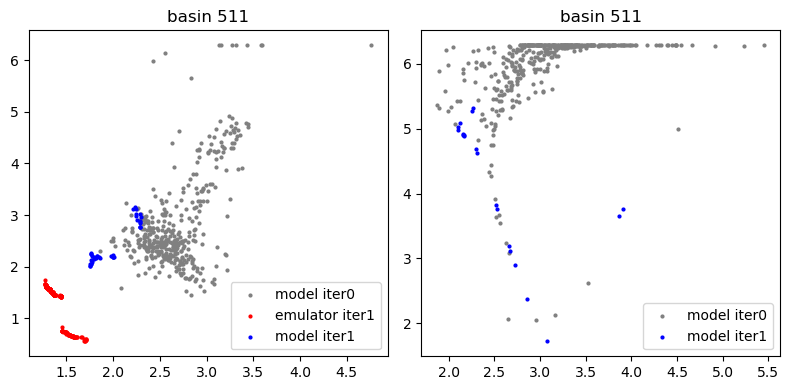

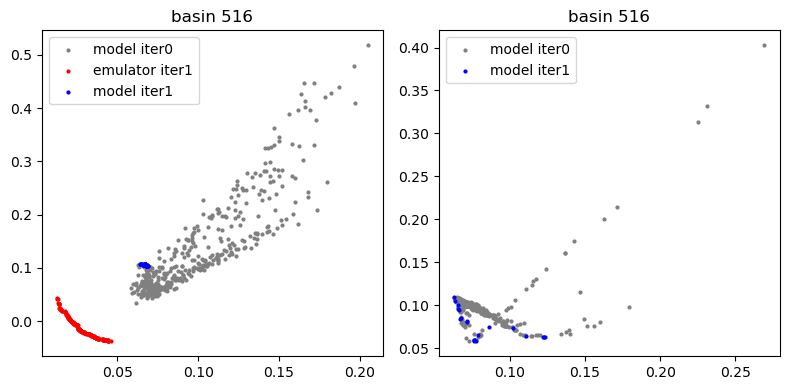

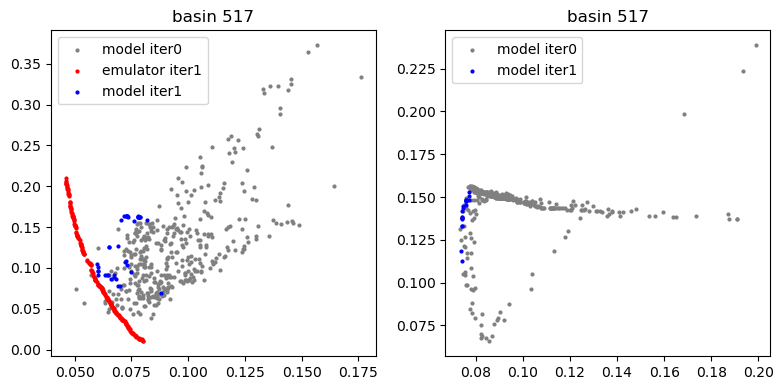

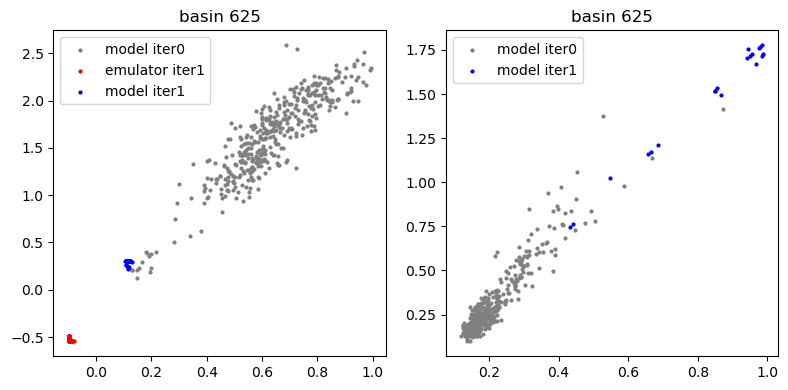

In [69]:

for i in range(len(basinindex)):
    b = basinindex[i]
    if cvkge[i,0]>cvkge[i,1]:  # only rf
        continue
    
    file1 = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_{b}_MOASMOcalib/ctsm_outputs/iter0_all_metric.csv'
    file2 = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_{b}_MOASMOcalib/ctsm_outputs/iter1_all_metric.csv'
    file3 = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO_bigrange/level1_{b}_MOASMOcalib/param_sets/intermediate_output_iter1.pkl.npz'

    df_model_iter0 = pd.read_csv(file1)
    df_model_iter1 = pd.read_csv(file2)

    file1 = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_{b}_MOASMOcalib/ctsm_outputs/iter0_all_metric.csv'
    file2 = f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_{b}_MOASMOcalib/ctsm_outputs/iter1_all_metric.csv'
    df_oldmodel_iter0 = pd.read_csv(file1)
    df_oldmodel_iter1 = pd.read_csv(file2)

    d_emula_iter1 = np.load(file3)

    bestx_sm_iter1=d_emula_iter1['bestx_sm']
    besty_sm_iter1=d_emula_iter1['besty_sm']
    x_sm_iter1=d_emula_iter1['x_sm']
    y_sm_iter1=d_emula_iter1['y_sm']


    fig = plt.figure(figsize=[8,4])
    fig.add_subplot(1,2,1)
    plt.scatter(df_model_iter0.values[:,0], df_model_iter0.values[:,1], 4, color='grey', label='model iter0')
    plt.scatter(besty_sm_iter1[:,0], besty_sm_iter1[:,1], 4, color='r', label='emulator iter1')
    plt.scatter(df_model_iter1.values[:,0], df_model_iter1.values[:,1], 4, color='b', label='model iter1')
    plt.legend()
    plt.title(f'basin {b}')
    
    fig.add_subplot(1,2,2)
    plt.scatter(df_oldmodel_iter0.values[:,0], df_oldmodel_iter0.values[:,1], 4, color='grey', label='model iter0')
    plt.scatter(df_oldmodel_iter1.values[:,0], df_oldmodel_iter1.values[:,1], 4, color='b', label='model iter1')
    plt.legend()
    plt.title(f'basin {b}')

    plt.tight_layout()
    plt.show()